# ML Model Diagnosis

In this lab you will implement the training set size experiment described in class, and also explore transfer learning using a pre-trained convolutional neural network (CNN) for image classification.

We will use the [Intel Image Classification dataset](https://www.kaggle.com/datasets/puneet6060/intel-image-classification).  Download it from Kaggle or from [OneDrive](https://cpslo-my.sharepoint.com/:u:/g/personal/jventu09_calpoly_edu/EW40XA_u31RNil1YzmBX-GUBSsqjb508K-iBA2ka5Uri_A?e=webnMY).

In [1]:
import glob
import imageio
import skimage
from matplotlib import pyplot as plt
import numpy as np
import tensorflow
import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


Here is some code to load the dataset.

In [2]:
label_names = ['buildings','forest','glacier','mountain','sea','street']

In [3]:
def load_split(split):
    images = []
    labels = []
    for label in label_names:
        image_paths = sorted(glob.glob(f'archive/seg_{split}/seg_{split}/{label}/*.jpg'))
        for path in image_paths:
            image = imageio.imread(path)
            if len(image.shape)<3:
                continue
            if image.shape[0]!=150 or image.shape[1]!=150 or image.shape[2]!=3:
                continue
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_split('train')
test_images, test_labels = load_split('test')

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_82001/1112897.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)


Text(0.5, 1.0, 'buildings')

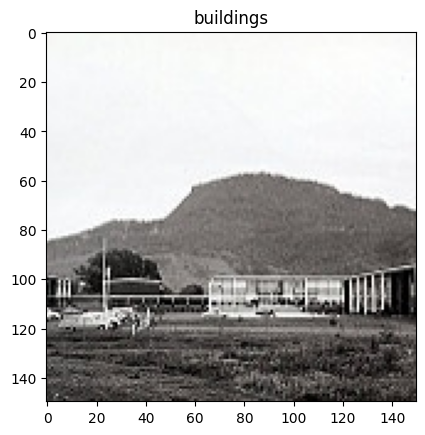

In [4]:
plt.imshow(train_images[0])
plt.title(train_labels[0])

This time we will randomly shuffle the training set, to support our later experiments.

In [5]:
inds = list(range(len(train_images)))
np.random.shuffle(inds)
train_images = train_images[inds]
train_labels = train_labels[inds]

Now we have arrays `train_images` and `train_labels` containing the images and labels for the training set, and the same for the test set.

Here we create a [MobileNetV2](https://arxiv.org/abs/1801.04381) model and download its pre-trained weights.  MobileNetV2 is a lightweight but high-performing CNN.  You can read about other Keras pre-trained models [here](https://keras.io/api/applications/).

The ```include_top=False``` argument tells Keras that we don't want the part of the network that is for 1000-class classification using the ImageNet labels.  Instead we take only the part of the network that computes a descriptor for the image (sometimes called an "embedding" or "latent vector" in the ML community).

We have the ```pooling='avg'``` argument because otherwise the network outputs a small grid of descriptors, so we are instead asking it to compute the average descriptor over the grid.

In [6]:
mobilenet = keras.applications.MobileNetV2(include_top=False,pooling='avg')

/var/folders/cn/043rpj9s7gn508l3jykd91gh0000gn/T/ipykernel_82001/568530069.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = keras.applications.MobileNetV2(include_top=False,pooling='avg')


1. Compute a MobileNetV2 descriptor for each image to make two lists, `train_descriptors` and `test_descriptors`.

Use ```mobilenet.predict(...,verbose=True)``` to run the network on the images and produce descriptors.

2. Build a k-nearest neighbors classifier on the training set (```sklearn.neighbors.KNeighborsClassifier```).

This model will find the $k$ nearest neighbors to the query point and output the most common label.  Use $k=10$.

Run the model on the training and testing sets and print out the accuracy score for each (```sklearn.metrics.accuracy_score``` or simply use ```model.score```).

3. Now let's explore how train and test accuracy change as training set size increases.

We will test a range of training set sizes in increments of 1000 (so 1000, 2000, 3000, ... up to the original size of the training set).

For each size setting $s$, fit a ```kNeighborsClassifer``` model to the first $s$ examples in the training set.   Use $k=10$.

Then compute the accuracy of the model on the chosen subset of the training set, and the entire test set.  *Note: always use the entire test set!*


Make a plot of the two accuracy values as the training set size increases.  Put both lines on the same plot.

Analyze the results.  If we want to improve the model's test set accuracy, what should we do -- add more training data, or choose a different model?